Linear SVM without kernel

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt
%matplotlib inline

In [51]:
from sklearn.datasets import load_iris
iris = load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris.target
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]
df = df.drop(df2.index)
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000,0.500000
std,0.641698,0.478739,1.449549,0.565153,0.502519
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.000000,2.800000,1.500000,0.200000,0.000000
50%,5.400000,3.050000,2.450000,0.800000,0.500000
75%,5.900000,3.400000,4.325000,1.300000,1.000000
max,7.000000,4.400000,5.100000,1.800000,1.000000


In [46]:
from sklearn.model_selection import train_test_split
X = df.drop(['target','flower_name','petal length (cm)','petal width (cm)'], axis='columns')
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
svm_noK = LinearSVC(C=1, loss="squared_hinge", random_state=42)
svm_noK.fit(X_train, y_train)

LinearSVC(C=1, random_state=42)

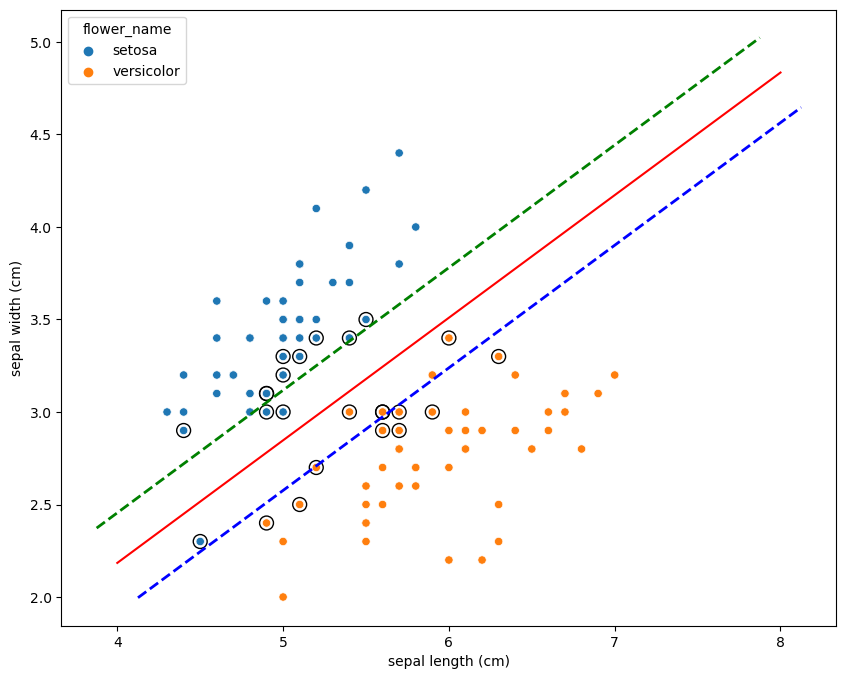

In [48]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x='sepal length (cm)', 
                y='sepal width (cm)', 
                hue='flower_name', 
                data=df);

w = svm_noK.coef_[0]
b = svm_noK.intercept_[0]
x_points = np.linspace(4, 8)  
y_points = -(w[0] / w[1]) * x_points - b / w[1]
plt.plot(x_points, y_points, c='r')


w_hat = w / np.sqrt(np.sum(w ** 2))

decision_function = svm_noK.decision_function(X_train)
support_vectors_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
distances_to_margin = np.abs(decision_function[support_vectors_indices])
margin = np.min(distances_to_margin)

hyperplane_points = np.array([[x_points[0], y_points[0]], [x_points[-1], y_points[-1]]])
new_points_up = hyperplane_points + w_hat * margin
new_points_down = hyperplane_points - w_hat * margin

plt.plot(new_points_up[:, 0], new_points_up[:, 1], 'b--', linewidth=2)
plt.plot(new_points_down[:, 0], new_points_down[:, 1], 'g--', linewidth=2)


X_train_reset = pd.DataFrame(X_train).reset_index(drop=True)

support_vectors_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors_indices = support_vectors_indices.tolist() 
support_vectors = X_train_reset.iloc[support_vectors_indices]
plt.scatter(support_vectors.iloc[:, 0], support_vectors.iloc[:, 1], s=100, facecolors='none', edgecolors='k')
plt.show()

In [52]:
from sklearn.metrics import classification_report
y_pred = svm_noK.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



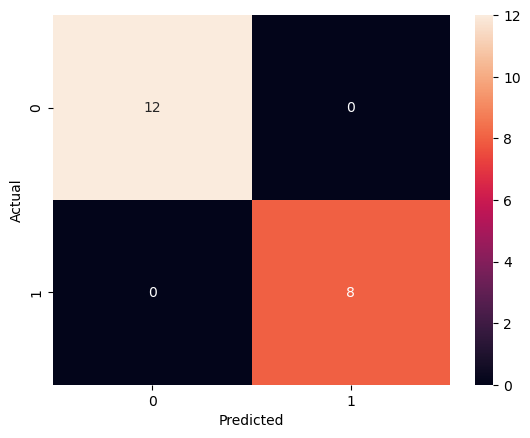

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap

In [3]:
X, y = datasets.make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X = X
y = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [6]:
linear_predictions = linear_svm.predict(X_test)
linear_accuracy = accuracy_score(y_test, linear_predictions)

In [7]:
cm = confusion_matrix(y_test, linear_predictions)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


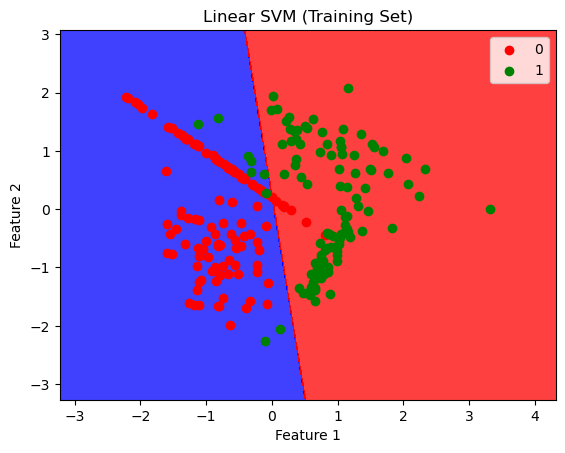

In [8]:
def visualize_results(X_set, y_set, title):
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, linear_svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('blue', 'red')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

visualize_results(X_train, y_train, 'Linear SVM (Training Set)')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


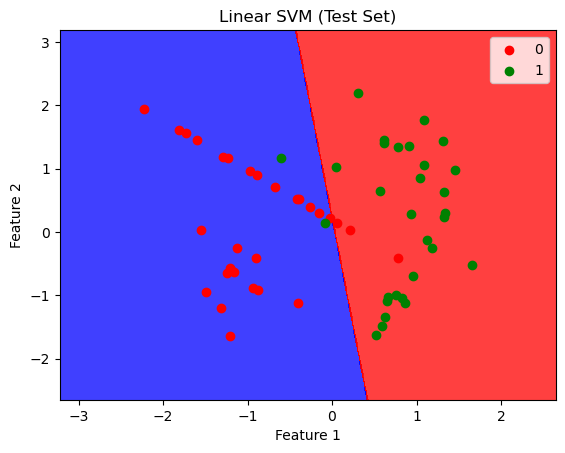

In [9]:
visualize_results(X_test, y_test, 'Linear SVM (Test Set)')

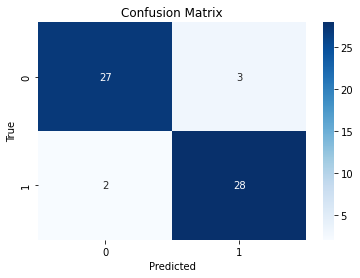

In [11]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()